In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '2'

import matplotlib.pyplot as plt
from bsccm import BSCCM
import jax.numpy as np
import numpy as onp
import time
from tqdm import tqdm
from led_array.bsccm_utils import *
from plot_utils import *
from image_utils import extract_patches, compute_eigenvalues
from cleanplots import *

bsccm = BSCCM('/home/hpinkard_waller/data/BSCCM/')

Opening BSCCM
Opened BSCCM


## Show effects of equalizing noise between contrasts

phtons per pixel:  {'LED119': 385.99352012423856, 'Brightfield': 1634.5032742470935, 'DPC_Right': 1054.716977792379}
Rescale to fraction:  {'LED119': 1.0, 'Brightfield': 0.23615340893216624, 'DPC_Right': 0.3659688127256271}


100%|██████████| 20000/20000 [00:00<00:00, 533219.43it/s]


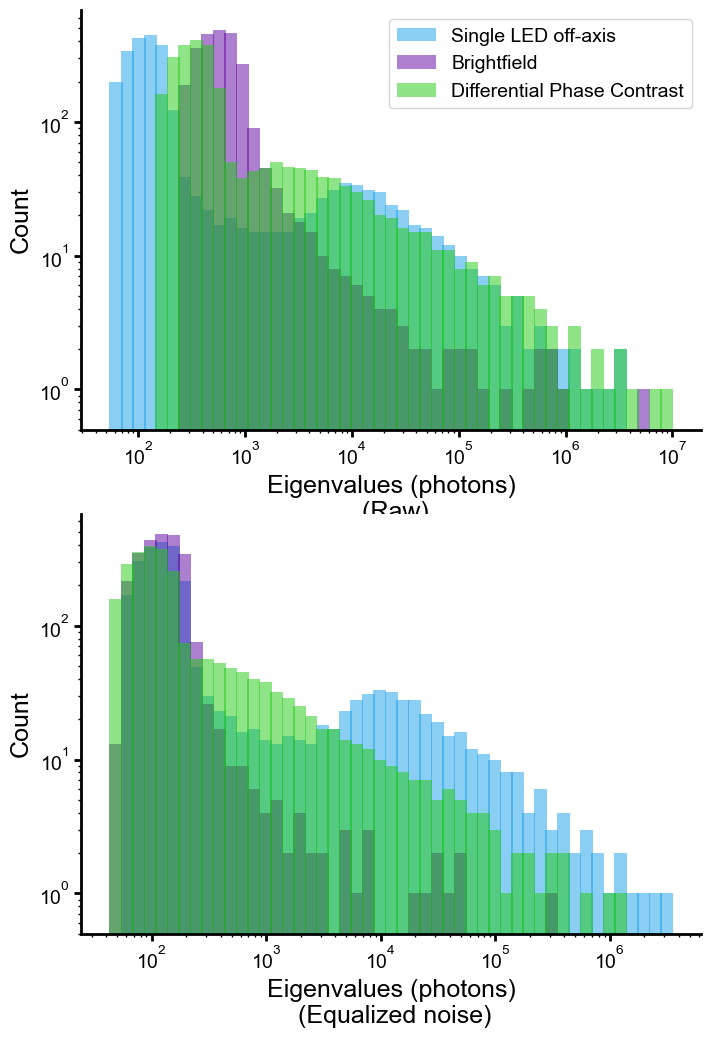

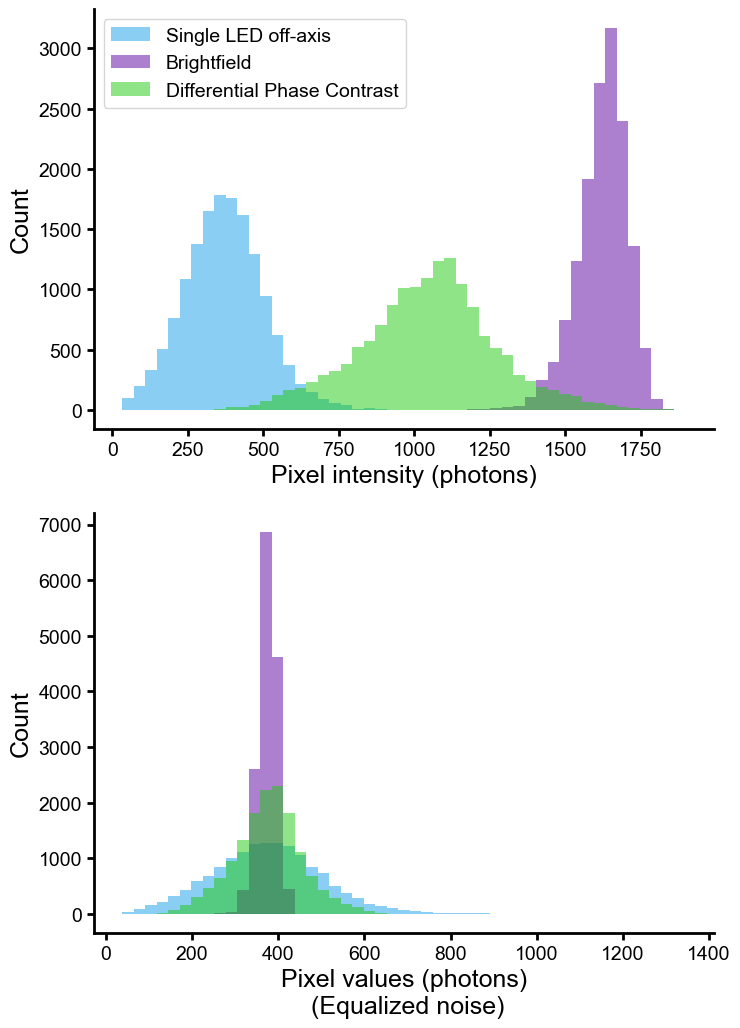

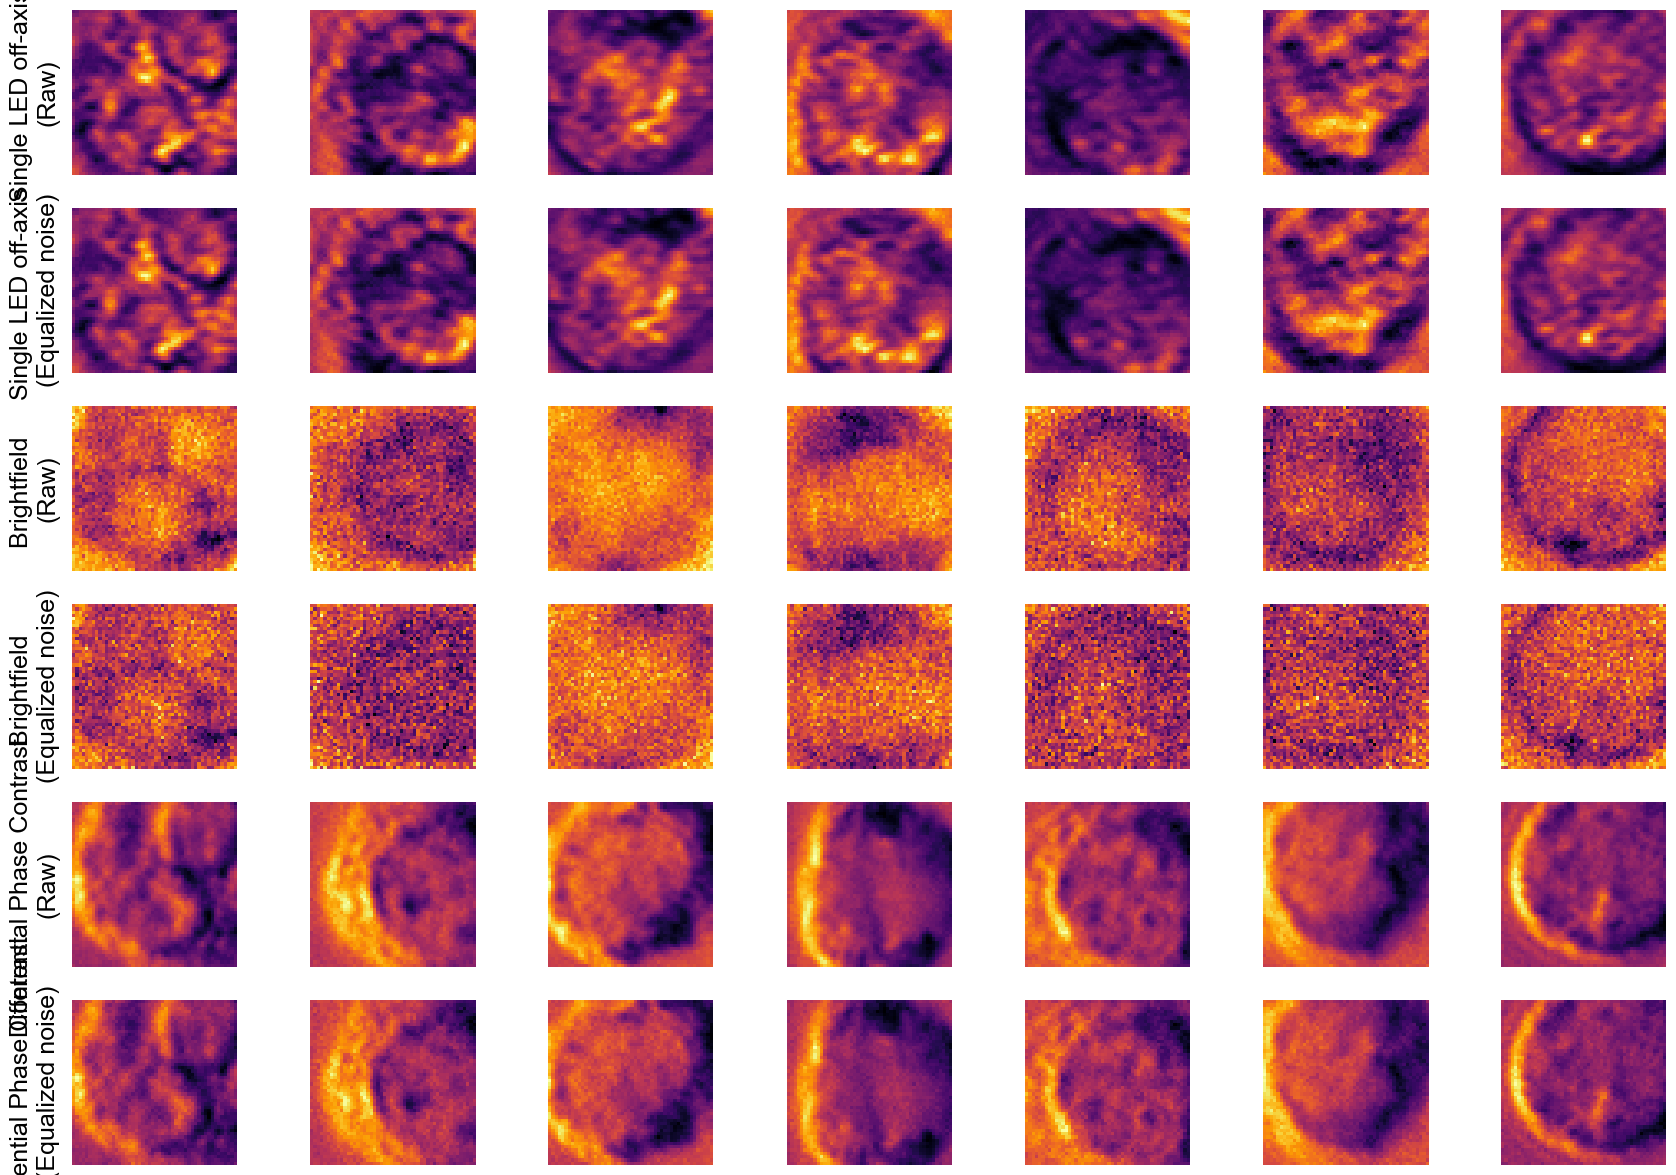

In [2]:
num_images = 10000
patch_size = 50
num_patches = 20000

channels = ['LED119', 'Brightfield', 'DPC_Right']

num_patches_to_show = 7

eigenvalue_fig, eigenvalue_ax = plt.subplots(2, 1, figsize=(8, 12))
brightness_fig, brightness_ax = plt.subplots(2, 1, figsize=(8, 12))
example_patch_background_fig, example_patch_background_axes = plt.subplots(2 * len(channels), 
                                        num_patches_to_show, figsize=(3 * num_patches_to_show, 5 * len(channels)))
hist = OverlayedHistograms(eigenvalue_ax[0])
hist2 = OverlayedHistograms(eigenvalue_ax[1])

brightness_hist = OverlayedHistograms(brightness_ax[0], log=False, logx=False)
brightness_hist2 = OverlayedHistograms(brightness_ax[1], log=False, logx=False)

photon_rescale_fractions = compute_photon_rescale_fraction(bsccm, channels)

for equalize_index, equalize_noise in enumerate([False, True]):
    for channel_index, channel in enumerate(channels):
        images = load_bsccm_images(bsccm, channel, num_images=num_images, edge_crop=32, convert_units_to_photons=True)
        patches = extract_patches(images, patch_size=patch_size, num_patches=num_patches)

        if equalize_noise:
            patches = add_shot_noise_to_experimenal_data(patches, photon_rescale_fractions[channel])
        values = compute_eigenvalues(patches)

        # plot a few example patches
        index = equalize_index + channel_index * 2
        for j in range(num_patches_to_show):
            im = example_patch_background_axes[index, j].imshow(patches[j], cmap='inferno', interpolation='nearest')
            clear_spines(example_patch_background_axes[index, j], all=True)
            example_patch_background_axes[index, j].set(xticks=[], yticks=[])
        example_patch_background_axes[index, 0].set_ylabel('{} {}'.format(
            get_display_channel_names(channel), '\n(Raw)' if not equalize_noise else '\n(Equalized noise)'))

        flattened = patches.flatten()[onp.random.choice(patches.size, 15000)]
    
        if equalize_noise:
            hist2.add(values, label=get_display_channel_names(channel))
            brightness_hist2.add(flattened, label=get_display_channel_names(channel))
        else:
            hist.add(values, label=get_display_channel_names(channel))
            brightness_hist.add(flattened, label=get_display_channel_names(channel))
    
    eigenvalue_ax[equalize_index].set(xlabel='Eigenvalues (photons)\n {}'.format(
        '(Equalized noise)' if equalize_noise else '(Raw)'), ylabel='Count')
    brightness_ax[equalize_index].set(xlabel='Pixel values (photons)\n {}'.format(
        '(Equalized noise)' if equalize_noise else '(Raw)'), ylabel='Count')
    clear_spines(brightness_ax[equalize_index])
    clear_spines(eigenvalue_ax[equalize_index])
                                                                           
hist.plot()
hist2.plot()
brightness_hist.plot()
brightness_hist2.plot()

eigenvalue_ax[0].legend()

brightness_ax[0].legend()
brightness_ax[0].set(xlabel='Pixel intensity (photons)', ylabel='Count')

eigenvalue_fig.savefig('/home/hpinkard_waller/figures/entropy_rates/' + 'noise_equalization_eigenvalues' + '.pdf', transparent=True)
brightness_fig.savefig('/home/hpinkard_waller/figures/entropy_rates/' + 'noise_equalization_pixel_histrograms' + '.pdf', transparent=True)
example_patch_background_fig.savefig('/home/hpinkard_waller/figures/entropy_rates/' + 'noise_equalization_example_patches' + '.pdf', transparent=True)


## Compare noiseless image entropy and encoder entropy
By looking at eigenvalues of noiseless images vs the eigenvalues of empty backgrounds
One would expect that these are positive correlated across contrasts, because good encoders depend chaotically
on the object, and thus are more senstive to variations in the imaging system

### TODO: add a plot that compares the correlation here

phtons per pixel:  {'LED119': 385.99352012423856, 'Brightfield': 1634.5032742470935, 'DPC_Right': 1054.716977792379}
Rescale to fraction:  {'LED119': 1.0, 'Brightfield': 0.23615340893216624, 'DPC_Right': 0.3659688127256271}


100%|██████████| 2000/2000 [00:00<00:00, 941799.48it/s]
/tmp/ipykernel_6820/1566133489.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the layout to make room for the colorbar


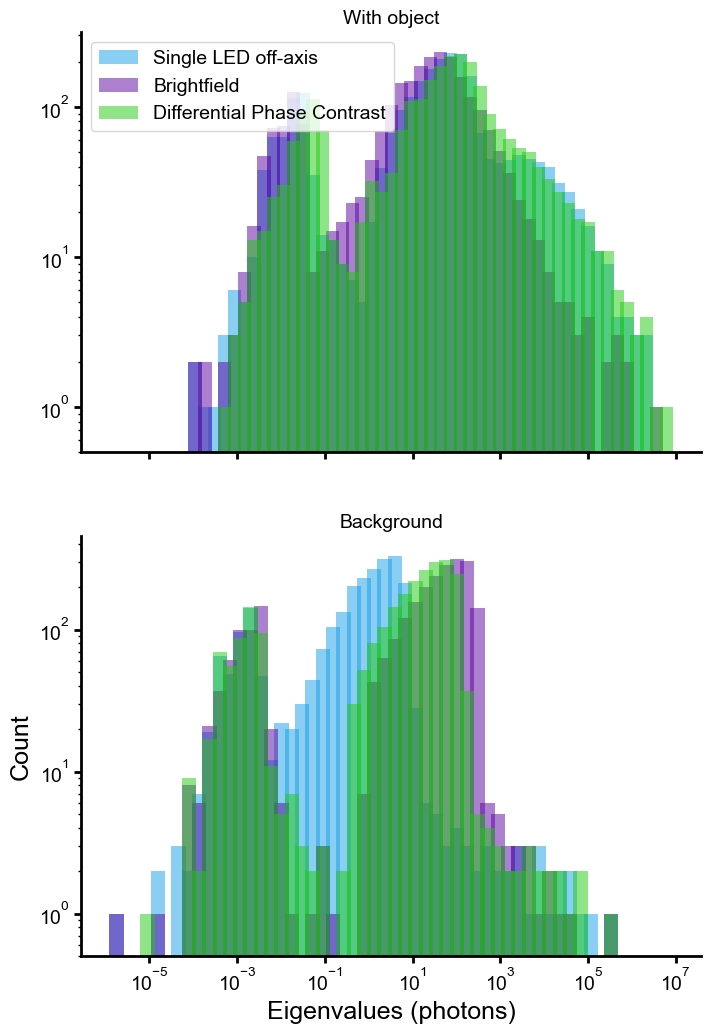

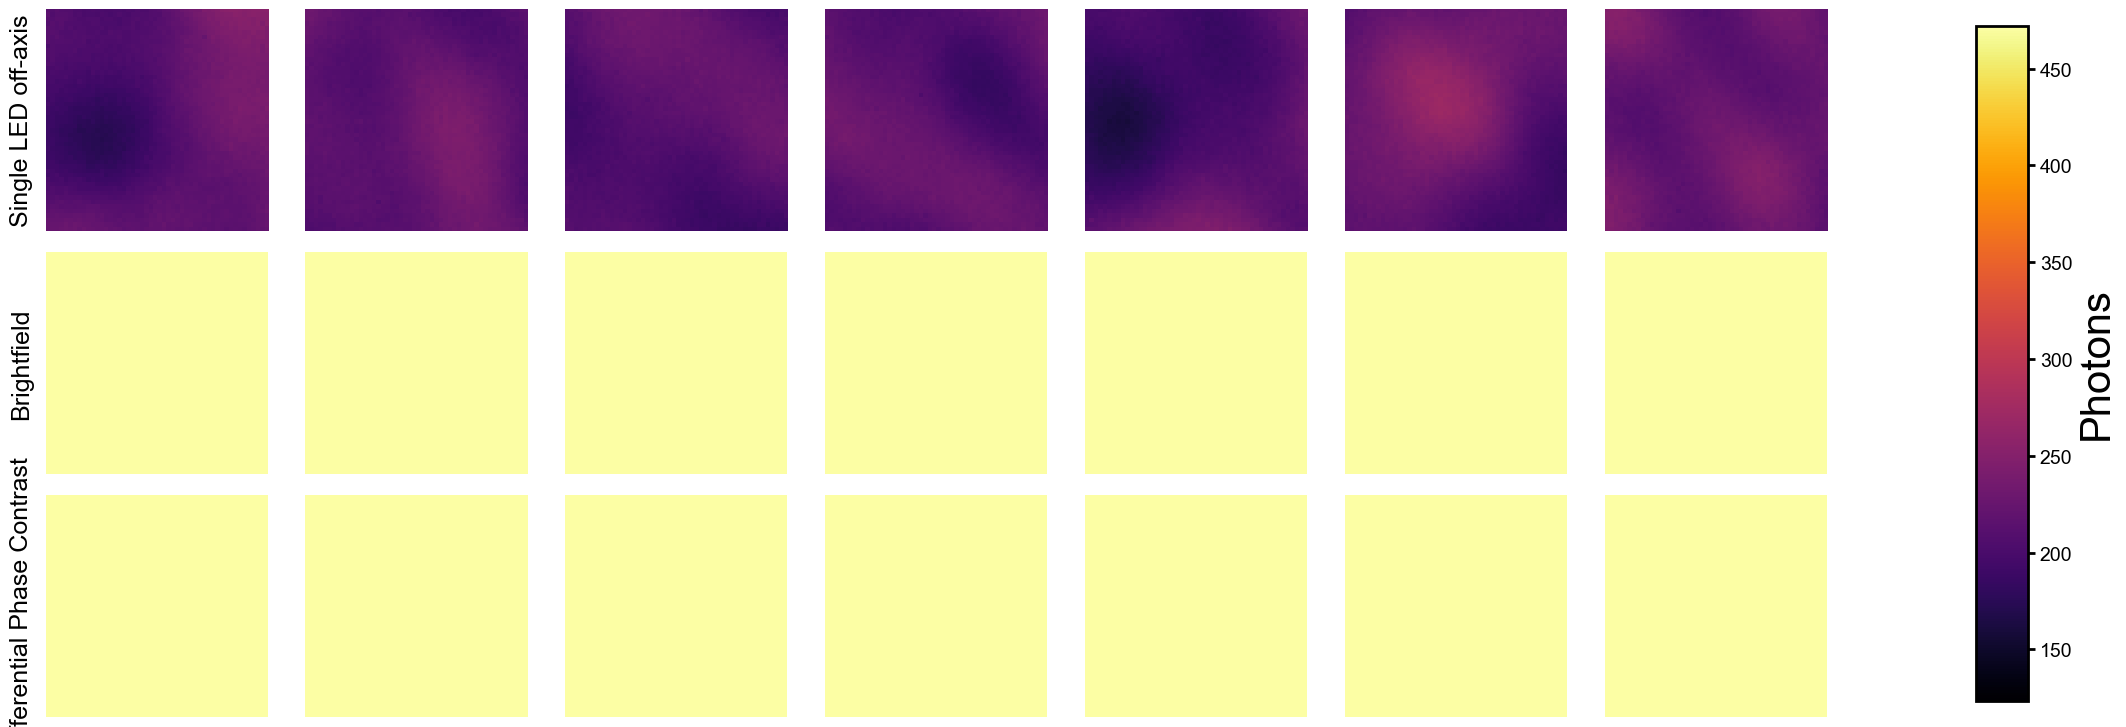

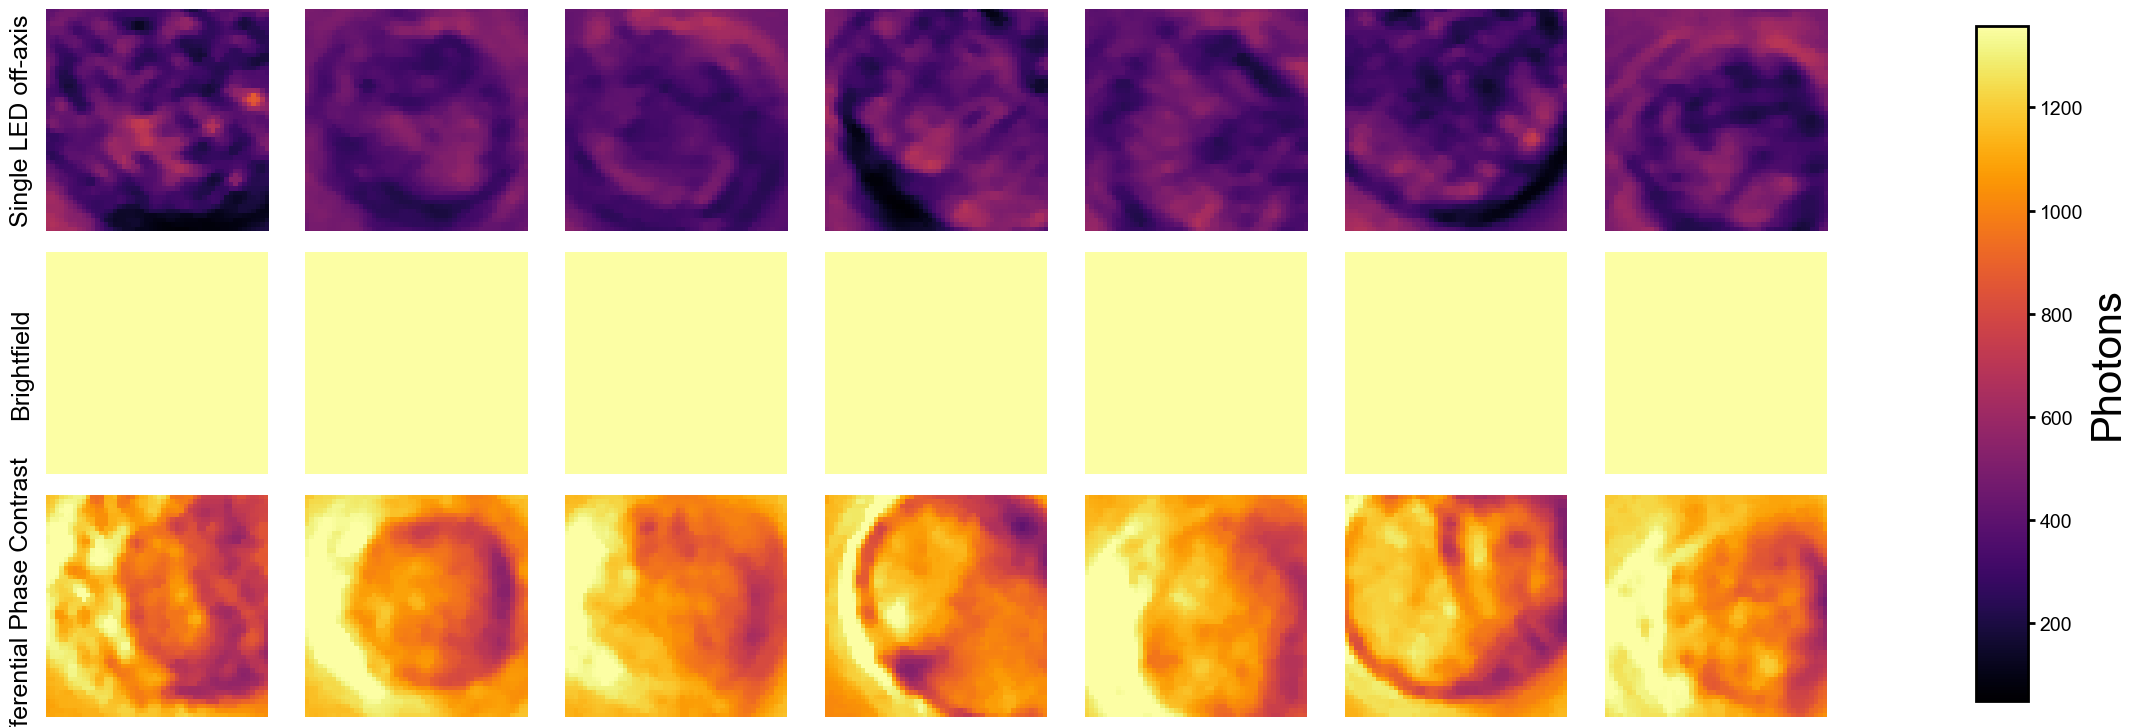

: 

In [3]:
num_images = 1000
patch_size = 50
num_patches = 2000


channels = ['LED119', 'Brightfield', 'DPC_Right' ]
num_patches_to_show = 7

eigenvalue_fig, eigenvalue_ax = plt.subplots(2, 1, figsize=(8, 12), sharex=True)
ev_hist1 = OverlayedHistograms(eigenvalue_ax[0], )
ev_hist2 = OverlayedHistograms(eigenvalue_ax[1],)
example_patch_background_fig, example_patch_background_axes = plt.subplots(len(channels), 
                                        num_patches_to_show, figsize=(3 * num_patches_to_show, 2.5 * len(channels)))

example_patch_fig, example_patch_axes = plt.subplots(len(channels), 
                                        num_patches_to_show, figsize=(3 * num_patches_to_show, 2.5 * len(channels)))


photon_rescale_fractions = compute_photon_rescale_fraction(bsccm, channels, empty_slides=False)


values = {}
for background in [0, 1]:
    contrast_limits = None

    # compute contrast limits by looking over all channels
    all_pix = []
    for channel in channels:
        # load median filtered images to simulate noiseless images
        photon_scaled_images = load_bsccm_images(bsccm, channel, num_images=500, edge_crop=32, 
                                                 empty_slides=background, convert_units_to_photons=True, median_filter=True)
        photon_scaled_images *= photon_rescale_fractions[channel]
        all_pix.append(photon_scaled_images.ravel())

    all_pix = np.array(all_pix).ravel()
    contrast_limits = [np.percentile(all_pix, 0), np.percentile(all_pix, 100)]


    values[background] = {}
    for channel_index, channel in enumerate(channels):
        # this loads noiseless background images (i.e. no cells) or median filtered images of cells (i.e. noiseless images)
        photon_scaled_images = load_bsccm_images(bsccm, channel, num_images=num_images, 
                                                 edge_crop=32, empty_slides=background, convert_units_to_photons=True,
                                                 median_filter=not background) 
        patches = extract_patches(photon_scaled_images, patch_size=patch_size, num_patches=num_patches)
        # background patches are assumed to be noiseless since they were created by taking the pixel-wise median over many captured images
        # but the still need to be rescaled by the average number of photons collected
        values[background][channel] = compute_eigenvalues(patches)


        patch_axes = example_patch_axes if not background else example_patch_background_axes
        index = channel_index 
        for j in range(num_patches_to_show):
            im = patch_axes[index, j].imshow(patches[j], cmap='inferno', interpolation='nearest',
                                              vmin=contrast_limits[0], vmax=contrast_limits[1])
            if background:
                background_im = im
            else:
                foreground_im = im
            clear_spines(patch_axes[index, j], all=True)
            patch_axes[index, j].set(xticks=[], yticks=[])
        patch_axes[index, 0].set_ylabel(get_display_channel_names(channel))


# compute min and max eigenvalues for all channels
min_eigenvalue = np.inf
max_eigenvalue = -np.inf
for background in [False, True]:
    for channel in channels:
        min_eigenvalue = min(min_eigenvalue, values[background][channel].min())
        max_eigenvalue = max(max_eigenvalue, values[background][channel].max())

        # plot the eigenspectra of the image and background patches
        if not background:
            ev_hist1.add(values[background][channel], label=get_display_channel_names(channel))
        else:
            ev_hist2.add(values[background][channel], label=get_display_channel_names(channel))

        eigenvalue_ax[int(background)].set(title='Background' if background else 'With object')    
        # make the limits feom 10e1 to 10e7 to match the other plots
        # eigenvalue_ax.set(xlim=(10e-1, 10e7))

ev_hist1.plot()
# zorder = {'DF_50': 4, 'LED119': 2, 'DPC_Right': 2, 'Brightfield': 3}
# zorder = {get_display_channel_names(c): zorder[c] for c in channels}
# ev_hist2.plot(zorder=zorder) 
ev_hist2.plot()

for fig, im in zip([example_patch_background_fig, example_patch_fig], [background_im, foreground_im]):
    cbar_ax = fig.add_axes([0.95, 0.05, 0.025, 0.9])  # [left, bottom, width, height]
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    fig.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the layout to make room for the colorbar
    cbar = fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    cbar.set_label("Photons", fontsize=30)


eigenvalue_ax[1].set( ylabel='Count')
eigenvalue_ax[1].set(xlabel='Eigenvalues (photons)', ylabel='Count')
clear_spines(eigenvalue_ax[0])
clear_spines(eigenvalue_ax[1])                                                                        
eigenvalue_ax[0].legend()

eigenvalue_fig.savefig('/home/hpinkard_waller/figures/entropy_rates/' + 'background_eigenvalues' + '.pdf', transparent=True)
example_patch_background_fig.savefig('/home/hpinkard_waller/figures/entropy_rates/' + 'background_patches' + '.pdf', transparent=True)
example_patch_fig.savefig('/home/hpinkard_waller/figures/entropy_rates/' + 'background_patches_(with_cells_comparison)' + '.pdf', transparent=True)

